In [41]:
!pip install -qU datasets

# ✅ -qU flags (quick refresher)
# -q → Quiet: reduces terminal output (only shows errors/warnings).

# -U → Upgrade: installs the latest version if already installed.


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
!pip install -qU transformers 

# 2. transformers
# Also from Hugging Face

# Provides access to pretrained NLP models (e.g., BERT, GPT, T5).



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
#  3. sentence-transformers
# From UKPLab

# Built on top of transformers, it simplifies creating sentence embeddings.

# Useful for semantic search, clustering, similarity comparison.

!pip install -qU sentence-transformers




[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
#  4. pinecone-client==3.1.0
# Official Pinecone Python client

# Connects to Pinecone's vector database service.

# Used for storing and searching vector embeddings (e.g., from sentence-transformers).
 
 

#  5. pinecone-text
# Provides utility functions to work with text and Pinecone.

# Converts text into vector embeddings using built-in models or integrations.

# 🔧 Example:

# from pinecone_text.sparse import BM25Encoder
# bm25 = BM25Encoder()


#  6. pinecone-notebooks
# A helper package that includes examples, utilities, and notebook support.

# Useful when running tutorials or demos from Pinecone in Colab/Jupyter.



# !pip uninstall pinecone-client




In [45]:
!pip install pinecone-notebooks pinecone-text


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Let's Connect to Pinecone

In [46]:
# !pip install python-dotenv
from dotenv import load_dotenv
import os

load_dotenv()

os.environ['PINECONE_API_KEY'] = os.getenv("PINECONE_API_KEY")


In [47]:
from pinecone import Pinecone
# pip3 install "pinecone[asyncio,grpc]"

In [48]:
pc = Pinecone()

In [49]:
from pinecone import ServerlessSpec

serversetup = ServerlessSpec(cloud='aws',region='us-east-1')


In [50]:
# create index
index_name = "hybrid-image-search"


To use the sparse-dense index in Pinecone we must set metric="dotproduct" and align the dimension value to that of our retrieval model, which outputs 512-dimensional vectors.

In [51]:
pc.list_indexes() # by default index is firstindex

[
    {
        "name": "hybrid-image-search",
        "metric": "dotproduct",
        "host": "hybrid-image-search-3vk0khy.svc.aped-4627-b74a.pinecone.io",
        "spec": {
            "serverless": {
                "cloud": "aws",
                "region": "us-east-1"
            }
        },
        "status": {
            "ready": true,
            "state": "Ready"
        },
        "vector_type": "dense",
        "dimension": 512,
        "deletion_protection": "disabled",
        "tags": null
    },
    {
        "name": "firstindex",
        "metric": "cosine",
        "host": "firstindex-3vk0khy.svc.aped-4627-b74a.pinecone.io",
        "spec": {
            "serverless": {
                "cloud": "aws",
                "region": "us-east-1"
            }
        },
        "status": {
            "ready": true,
            "state": "Ready"
        },
        "vector_type": "dense",
        "dimension": 384,
        "deletion_protection": "disabled",
        "tags": null
   

In [52]:
pc.list_indexes().names()

['hybrid-image-search', 'firstindex']

In [53]:
import time

if index_name not in pc.list_indexes().names():
    pc.create_index(
        index_name,
        dimension=512,
        metric="dotproduct",
        spec=serversetup
    )


    while not pc.describe_index(index_name).status['ready']:
        time.sleep(1)

In [54]:
pc.list_indexes().names()

['hybrid-image-search', 'firstindex']

In [55]:
# we have created index

In [56]:
# connect to index
index = pc.Index(index_name)

In [57]:
index.describe_index_stats()

{'dimension': 512,
 'index_fullness': 0.0,
 'metric': 'dotproduct',
 'namespaces': {},
 'total_vector_count': 0,
 'vector_type': 'dense'}

# Load Dataset

We will work with a subset of the Open Fashion Product Images dataset, consisting of ~44K fashion products with images and category labels describing the products. The dataset can be loaded from the Huggigface Datasets hub as follows:


In [58]:
from datasets import load_dataset


In [59]:
fashion = load_dataset("ashraq/fashion-product-images-small",
                       split="train")

In [60]:
fashion


Dataset({
    features: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image'],
    num_rows: 44072
})

In [61]:
import pandas as pd
df = pd.DataFrame(fashion)

In [62]:
import matplotlib.pyplot as plt

for i in range(10):
    fig= df['image'][i]
    fig.show()

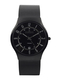

In [63]:
df['image'][i]

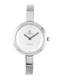

In [64]:
df['image'][2]

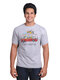

In [65]:
df['image'][5]

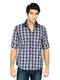

In [66]:
df['image'][0]

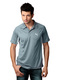

In [67]:
df['image'][4]


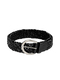

In [68]:
df['image'][11]

In [70]:
fashion["image"]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.Image.Image image mode=L size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.Image.Image image mode=RGB size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.Image.Image image mode=RGB size=60x80>,
 <PIL.Image.Image image mode=RGB size=60x80>,
 <PIL.Image.Image image mode=RGB size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.Image.Image image mode=RGB size=60x80>,
 <PIL.Image.Image image mode=RGB size=60x80>,
 <PIL.Image.Image image mode=RGB size=60x80>,
 <PIL.Image.Image image mode=RGB size=60x80>,
 <PIL.Image.Image image mode=RGB size=60x80>,
 <PIL.Image.Image image mode=RGB size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.Image.Image image mode=RGB size=60x80>,
 <

In [71]:
images   = fashion['image']
metadata = fashion.remove_columns("image")


In [72]:
metadata = metadata.to_pandas()

In [73]:
metadata

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44067,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44068,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44069,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44070,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [74]:
from pinecone_text.sparse import BM25Encoder

bm25 = BM25Encoder()



[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ANKIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANKIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [75]:
"Turtle Check Men Navy Blue Shirt".lower().split()

['turtle', 'check', 'men', 'navy', 'blue', 'shirt']

BM25 requires training on a representative portion of the dataset. We do this like so:

In [76]:
bm25.fit(metadata['productDisplayName'])

100%|██████████| 44072/44072 [00:03<00:00, 11447.11it/s]


In [77]:
metadata['productDisplayName'][0]

'Turtle Check Men Navy Blue Shirt'

In [82]:
bm25.encode_queries(metadata['productDisplayName'][0])

{'indices': [23789636,
  1830646559,
  632192512,
  931643408,
  3905155331,
  3828986392],
 'values': [0.3276687848622804,
  0.19377339510596148,
  0.040475545164610806,
  0.1808640794607714,
  0.10791423980552016,
  0.1493039556008558]}

In [81]:
bm25.encode_documents(metadata['productDisplayName'][0])

{'indices': [23789636,
  1830646559,
  632192512,
  931643408,
  3905155331,
  3828986392],
 'values': [0.4449638258432887,
  0.4449638258432887,
  0.4449638258432887,
  0.4449638258432887,
  0.4449638258432887,
  0.4449638258432887]}

And for the stored docs, we only need the "IDF" part:


✅ What “we only need the ‘IDF’ part” means:
In some systems, especially when you're storing documents for later search or retrieval, you don’t need to store the full TF-IDF values. Instead:

You store the raw document content or its term frequencies (TF).

You precompute and store the IDF values for all terms in the corpus.

So later, when a query comes in:

You compute the TF of the query terms on the fly.

Use the stored IDF values to calculate TF-IDF scores.

# Dense Vector

We will use the CLIP to generate dense vectors for product images. We can directly pass PIL images to CLIP as it can encode both images and texts. We can load CLIP like so:

In [83]:
from sentence_transformers import SentenceTransformer
import torch


In [84]:
device = "cuda"if torch.cuda.is_available() else "cpu"

In [85]:
device

'cpu'

In [ ]:
model = SentenceTransformer("sentence-transformer/clip-ViT-B-32")

No sentence-transformers model found with name Sentence-transformer/clip-ViT-B-32. Creating a new one with mean pooling.


OSError: Sentence-transformer/clip-ViT-B-32 is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`